### Heart Disease UCI (Data set 1)

In [1]:
from utils import read_data, prepare_data, top3features
from IPython.display import IFrame

In [2]:
IFrame('EDA-heart-disease.html', '100%' , 600)

### Logistic Regression

In [3]:
# Test if model weights of my LogReg implementation
# are close to sklearn reference model weights
!python -m unittest -b test_models.TestWeights.test_logistic_regression 

.
----------------------------------------------------------------------
Ran 1 test in 0.310s

OK


Training starts..
Iteration: 0	Train loss: 0.5899433653815165
Iteration: 200	Train loss: 0.4245654082919742
Iteration: 400	Train loss: 0.42106042023403834
Iteration: 600	Train loss: 0.4205250987405365
Iteration: 800	Train loss: 0.42042724470471676
Iteration: 1000	Train loss: 0.4204087899496661
Iteration: 1200	Train loss: 0.4204052824663313
Iteration: 1400	Train loss: 0.4204046140763764
Iteration: 1600	Train loss: 0.42040448652563367
Iteration: 1800	Train loss: 0.42040446215843286
Iteration: 2000	Train loss: 0.4204044574989523
Training finished successfully!



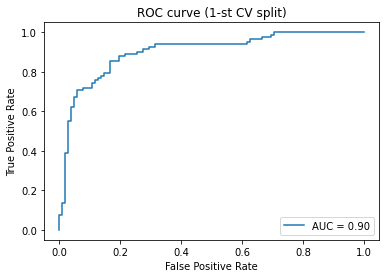

(5 Fold) Cross-Validation

Train Accuracy: 0.8388586956521739

Test Accuracy: 0.792391304347826
Test Precision: 0.8000717490357557
Test Sensitivity: 0.8296035823795339
Test F1: 0.8087648945527611
Test ROC_AUC: 0.862209401350502

Top3 feature according to LogReg() : sex, ca, fbs


<Figure size 432x288 with 0 Axes>

In [4]:
%matplotlib inline
%run scripts/logistic_regression.py

In [5]:
from scripts.logistic_regression import evaluate as eval_cls
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

col_names, X, y = prepare_data('heart-disease')

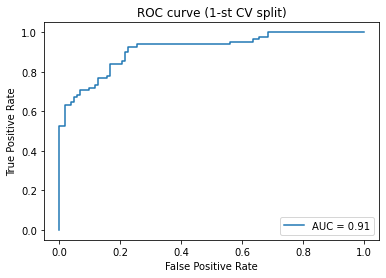

(5 Fold) Cross-Validation

Train Accuracy: 0.8377717391304348

Test Accuracy: 0.8021739130434783
Test Precision: 0.8118839133072342
Test Sensitivity: 0.8386361783199598
Test F1: 0.8186691836808823
Test ROC_AUC: 0.8654106684928831

Top3 feature according to LogisticRegression(max_iter=2000, penalty='none') : sex, ca, fbs


In [6]:
LR_cls = LogisticRegression(penalty='none', max_iter=2000)
LR_cls.fit(X, y)
eval_cls(LogisticRegression(), X, y)
print(f'\nTop3 feature according to {LR_cls} : ' + ', '.join(top3features(LR_cls, col_names)))

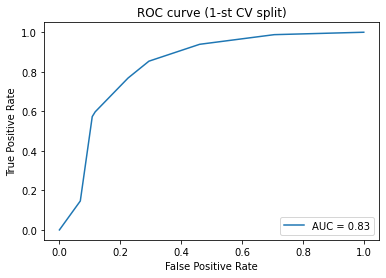

(5 Fold) Cross-Validation

Train Accuracy: 0.8521739130434783

Test Accuracy: 0.7021739130434782
Test Precision: 0.7202287316120091
Test Sensitivity: 0.7318223449243764
Test F1: 0.7202215569694191
Test ROC_AUC: 0.7162352113381629

Top3 feature according to DecisionTreeClassifier(max_depth=5) : chol, age, cp


In [7]:
DT_cls = DecisionTreeClassifier(max_depth=5)
DT_cls.fit(X, y)
eval_cls(DecisionTreeClassifier(max_depth=5), X, y)
print(f'\nTop3 feature according to {DT_cls} : ' + ', '.join(top3features(DT_cls, col_names)))

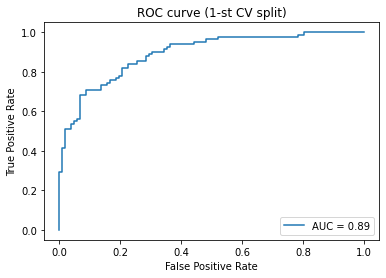

(5 Fold) Cross-Validation

Train Accuracy: 0.8638586956521739

Test Accuracy: 0.7880434782608695
Test Precision: 0.7863845441362605
Test Sensitivity: 0.8402474207141882
Test F1: 0.8086112713693243
Test ROC_AUC: 0.8435814625716074

Top3 feature according to RandomForestClassifier(max_depth=5) : exang, thalach, cp


In [8]:
RF_cls = RandomForestClassifier(max_depth=5)
RF_cls.fit(X, y)
res = eval_cls(RandomForestClassifier(max_depth=5), X, y)
print(f'\nTop3 feature according to {RF_cls} : ' + ', '.join(top3features(RF_cls, col_names)))

### Medical Cost (Data set 2)

In [9]:
IFrame('EDA-medical-cost.html', '100%', 600)

### Linear Regression

In [10]:
# Test if coefficients of my plain OLS implementation 
# are close to sklearn reference model weights
!python -m unittest -v test_models.TestWeights.test_ols_regression

test_ols_regression (test_models.TestWeights) ... Training starts..
Training finished successfully!

ok

----------------------------------------------------------------------
Ran 1 test in 0.061s

OK


In [11]:
# Test if coefficients of my Ridge estimator implementation 
# are close to sklearn reference model
!python -m unittest -v test_models.TestWeights.test_ridge_regression

test_ridge_regression (test_models.TestWeights) ... Training starts..
Training finished successfully!

FAIL

FAIL: test_ridge_regression (test_models.TestWeights)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/home/kolesod/Projects/Proxet-Assignment/test_models.py", line 56, in test_ridge_regression
    np.testing.assert_almost_equal(
  File "/home/kolesod/Projects/Proxet-Assignment/env/lib/python3.9/site-packages/numpy/testing/_private/utils.py", line 583, in assert_almost_equal
    return assert_array_almost_equal(actual, desired, decimal, err_msg)
  File "/home/kolesod/Projects/Proxet-Assignment/env/lib/python3.9/site-packages/numpy/testing/_private/utils.py", line 1046, in assert_array_almost_equal
    assert_array_compare(compare, x, y, err_msg=err_msg, verbose=verbose,
  File "/home/kolesod/Projects/Proxet-Assignment/env/lib/python3.9/site-packages/numpy/testing/_private/utils.py", line 844, in assert_array_compa

Training starts..
Training finished successfully!



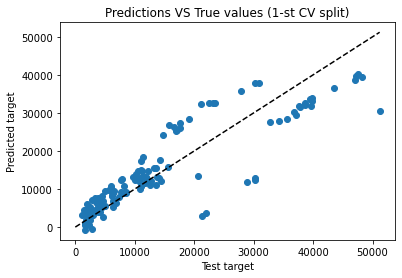

(10 Fold) Cross-validation

Train RMSE: 6026.006967081818
Test RMSE: 6068.335523871994

Top3 feature according to LinReg(reg_lambda=0) : children, smoker, region

IPython CPU timings (estimated):
  User   :       0.84 s.
  System :       0.02 s.
Wall time:       0.26 s.


<Figure size 432x288 with 0 Axes>

In [12]:
%run -t scripts/linear_regression.py 

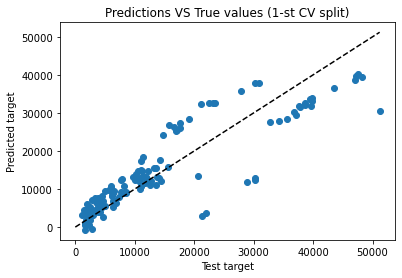

Training starts..
Training finished successfully!

(10 Fold) Cross-validation

Train RMSE: 6026.006967081818
Test RMSE: 6068.335523871994

Top3 feature according to LinReg(reg_lambda=1.0) : children, smoker, region

IPython CPU timings (estimated):
  User   :       0.48 s.
  System :       0.02 s.
Wall time:       0.12 s.


<Figure size 432x288 with 0 Axes>

In [13]:
# Add regularization parameter
%run -t scripts/linear_regression.py -l 1

Training starts..
Training finished successfully!



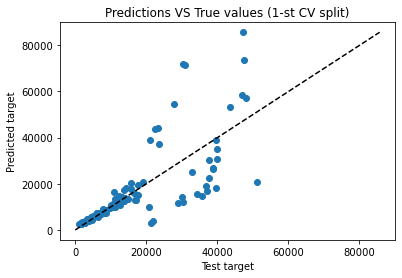

(10 Fold) Cross-validation

Train RMSE: 8306.7591542544
Test RMSE: 8348.386105721343

Top3 feature according to LinReg(reg_lambda=1.0) : children, smoker, region

IPython CPU timings (estimated):
  User   :       0.45 s.
  System :       0.01 s.
Wall time:       0.11 s.


<Figure size 432x288 with 0 Axes>

In [14]:
# Apply log transform 
%run -t scripts/linear_regression.py -l 1 -t

In [15]:
from scripts.linear_regression import evaluate as eval_reg
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression, Ridge, Lasso

col_names, X, y = prepare_data('medical-cost')

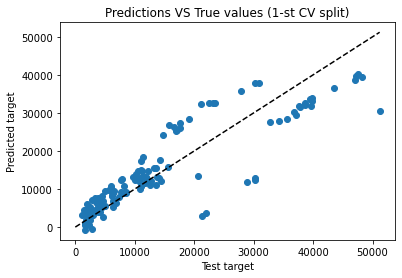

(10 Fold) Cross-validation

Train RMSE: 6026.006967081818
Test RMSE: 6068.335523871991

Top3 feature according to LinearRegression() : children, smoker, region


In [16]:
LR_reg = LinearRegression()
LR_reg.fit(X, y)
res = eval_reg(LinearRegression(), X, y)
print(f'\nTop3 feature according to {LR_reg} : ' + ', '.join(top3features(LR_reg, col_names)))

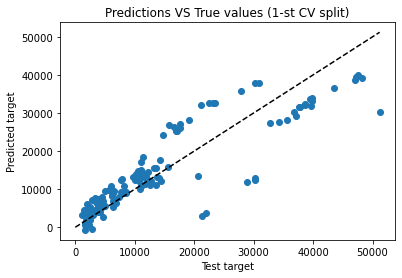

(10 Fold) Cross-validation

Train RMSE: 6026.252888255925
Test RMSE: 6068.108057167905

Top3 feature according to Ridge() : children, smoker, region


In [17]:
ridge = Ridge()
ridge.fit(X, y)
eval_reg(Ridge(), X, y)
print(f'\nTop3 feature according to {ridge} : ' + ', '.join(top3features(ridge, col_names)))

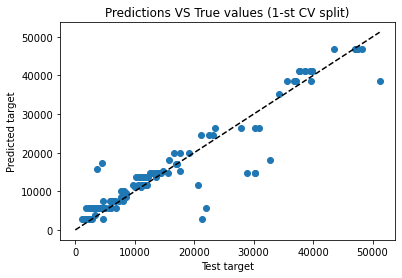

(10 Fold) Cross-validation

Train RMSE: 4169.211576517451
Test RMSE: 4811.592508988553

Top3 feature according to DecisionTreeRegressor(max_depth=5) : age, smoker, bmi


In [18]:
DT_reg = DecisionTreeRegressor(max_depth=5)
DT_reg.fit(X, y)
eval_reg(DecisionTreeRegressor(max_depth=5), X, y)
print(f'\nTop3 feature according to {DT_reg} : ' + ', '.join(top3features(DT_reg, col_names)))

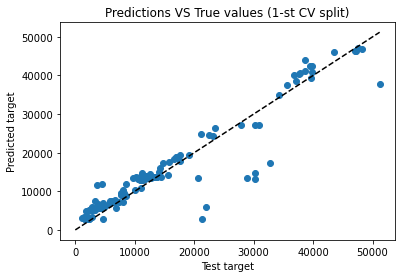

(10 Fold) Cross-validation

Train RMSE: 4033.426438346997
Test RMSE: 4555.35485318159

Top3 feature according to RandomForestRegressor(max_depth=5) : age, smoker, bmi


In [19]:
RF_reg = RandomForestRegressor(max_depth=5)
RF_reg.fit(X, y.flatten())
eval_reg(RandomForestRegressor(max_depth=5), X, y.flatten())
print(f'\nTop3 feature according to {RF_reg} : ' + ', '.join(top3features(RF_reg, col_names)))